In [1]:
# imports

%matplotlib inline
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from matplotlib.ticker import AutoLocator, MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
from tftb.processing.cohen import WignerVilleDistribution as WVD

sys.path.append('../../pyVisOS/')
sys.path.append('../')
import osh5def
import osh5io
import osh5vis
import osh5utils

import Plot

In [3]:
# clear previous diagnostics
os.system('rm -rf MS/ TIMINGS/')

# run osiris simulation
os.system('../../osiris/bin/osiris-2D.e test_brewster.2d')

 Osiris running on host avrutskys-mbp
 Current working directory = /Users/avrutsky/College/Lab/osiris-simulations/2D brewster
 Timer resolution is    2.8000000000000003E-008  seconds
 
 ***************************************************************
 *          Using double precision AVX optimized Code          *
 ***************************************************************
 
 Software revision: r4f85ea0
 
 
 Reading input file, full name: test_brewster.2d
 
 Reading global simulation options... 
 Reading parallel node configuration... 
 Reading grid configuration...
 cartesian coordinates
 Reading tstep configuration... 
 Reading restart configuration... 
 Reading g_space configuration... 
 Reading time configuration... 
 Reading emf configuration... 
  - no smoothing specified
 Reading part configuration... 
 - species (1) configuration...
    Species name : electrons
 Reading zpulses ... 
  - Reading zpulse configuration...
 Reading current configuration...
  - no smoothing speci

0

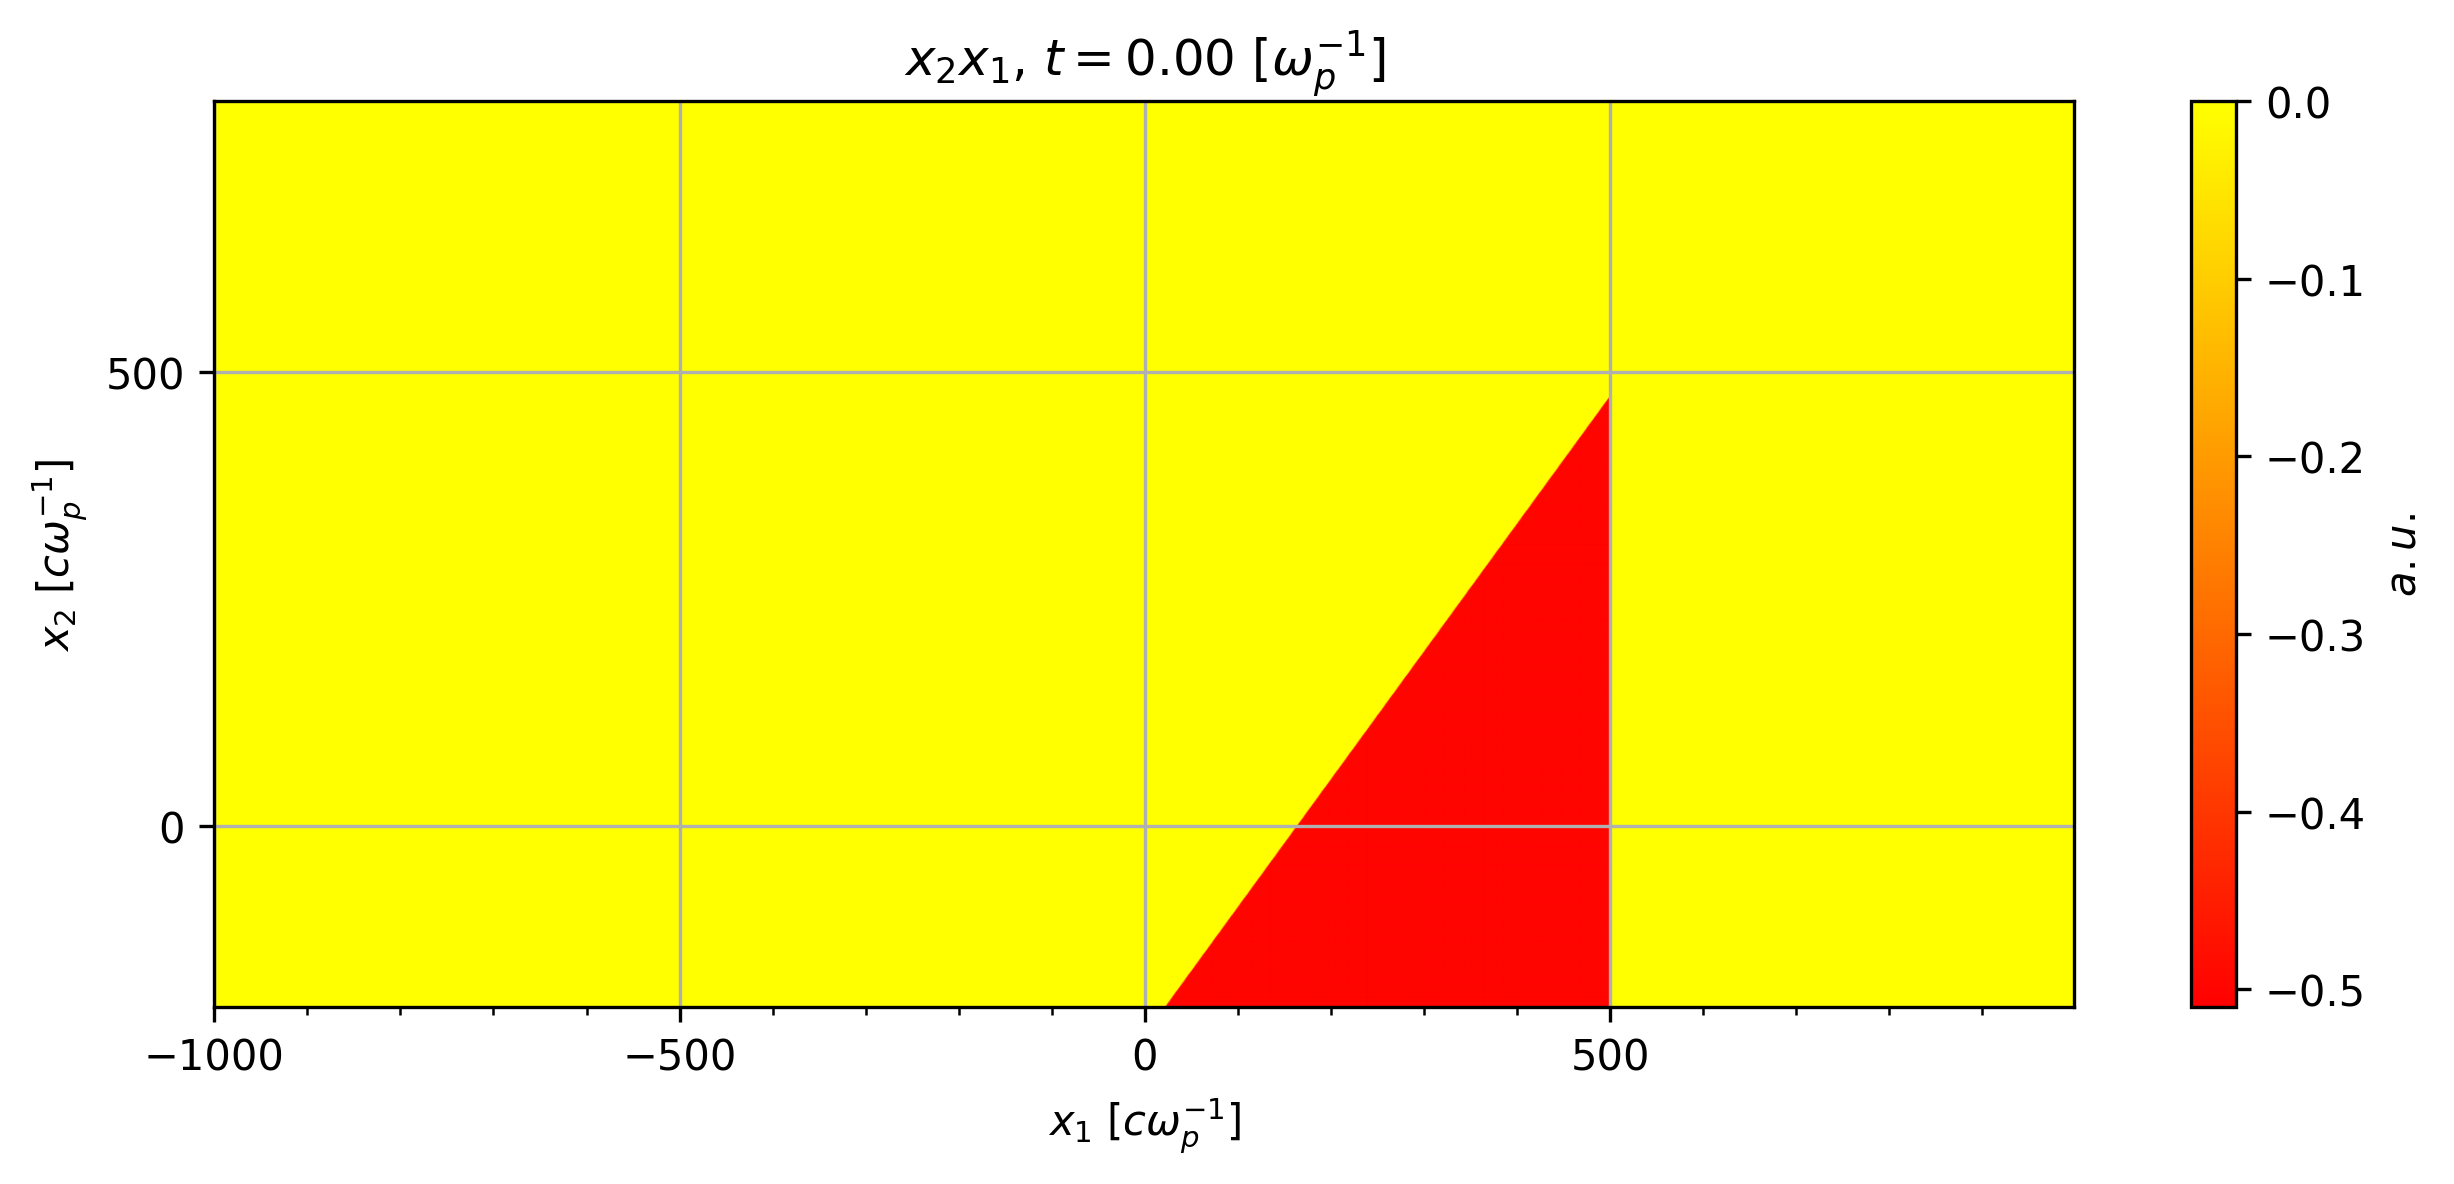

In [4]:
# plot phasespace
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(10,4), dpi=300)

#Plot.Ex(ax1, 'e2-000015.h5')
Plot.x(ax, 'x2x1-electrons-000000.h5', colorbar=True, cmap='autumn', alpha=1.0);
#Plot.x(ax[1], 'x1-electrons-000000.h5');
#Plot.x(ax[2], 'x2-electrons-000000.h5', transpose=True);
ax.grid()
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(500))
#ax[1].imshow(data.view(np.ndarray))
#print(data.axes[1].ax) # x1
#ax[2].plot(data.axes[0].ax) # x2


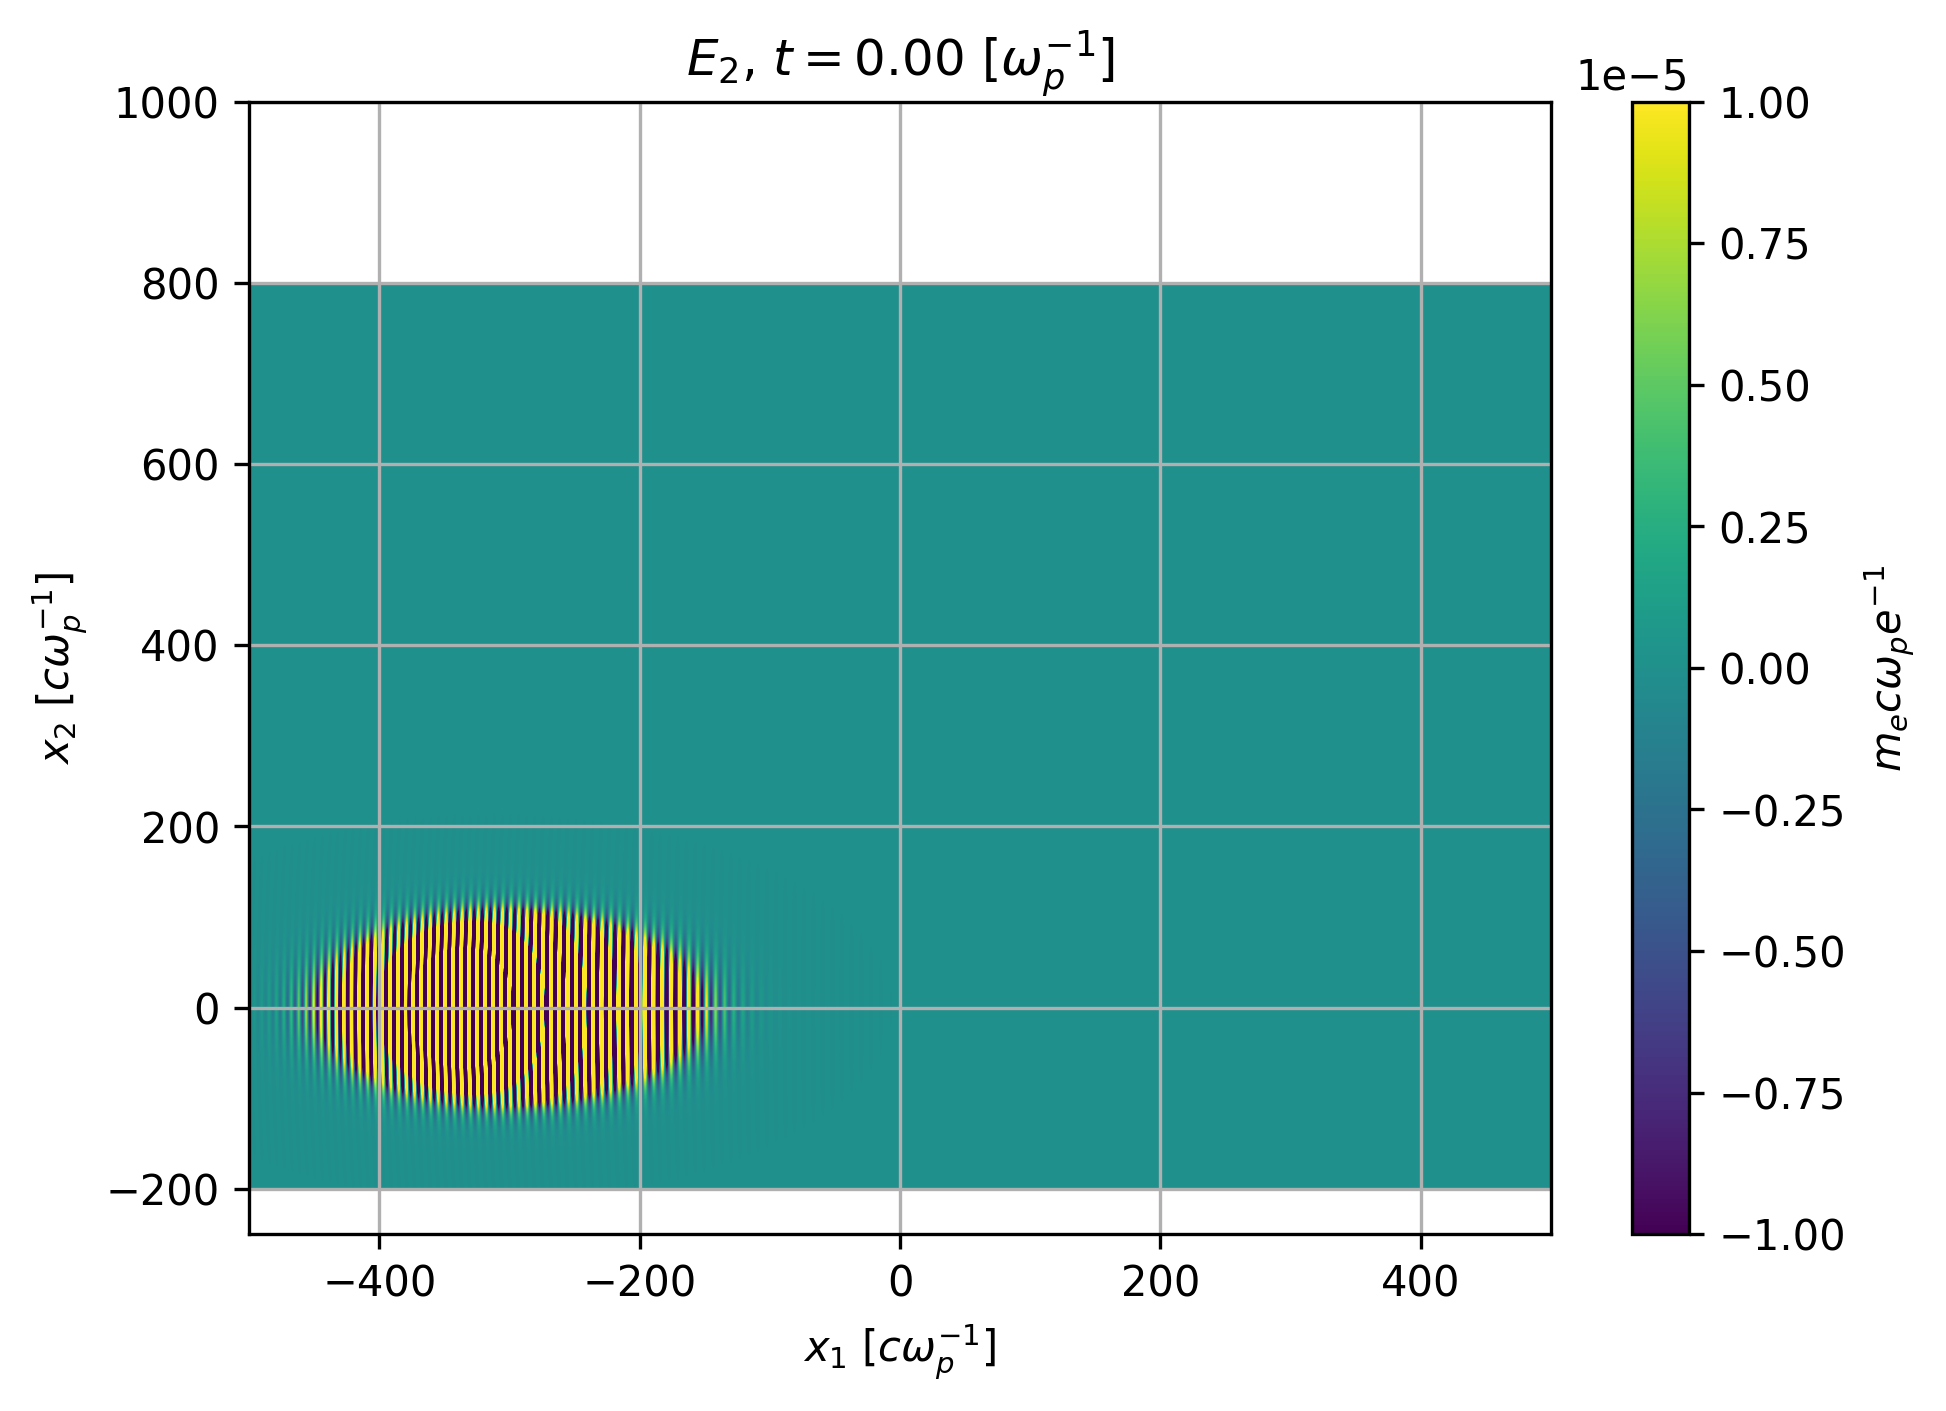

In [6]:
fig, ax = plt.subplots(dpi=300, figsize=(7,5))
Plot.Ex(ax, 'e2-000000.h5', vmax=0.00001, vmin=-0.00001, xlim=[-500,500], ylim=[-250,1000]);

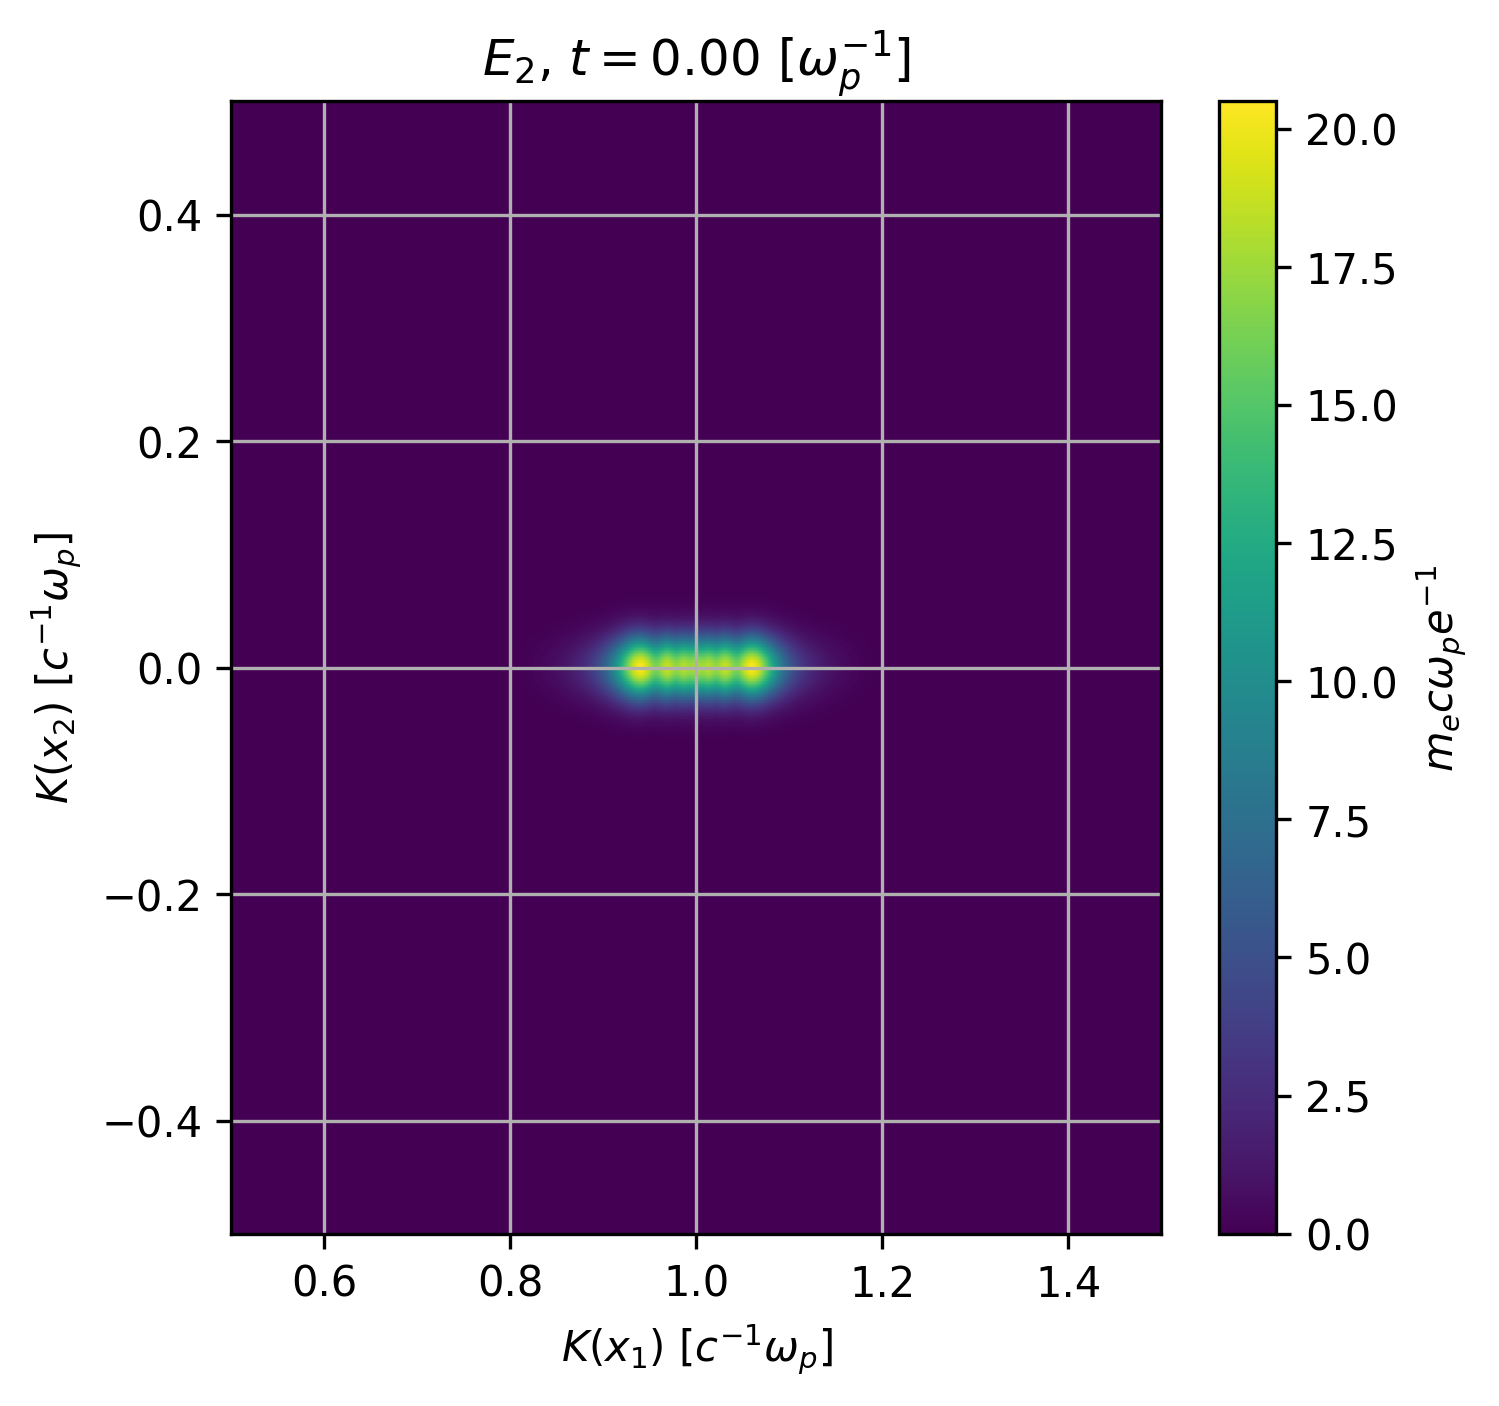

In [111]:
fig, ax = plt.subplots(dpi=300, figsize=(5,5))
Plot.Efft2(ax, 'e2-000000.h5', xlim=[0.5,1.5], ylim=[-0.5,0.5]);

/Users/avrutsky/College/Lab/simulations/2d plasma short/../Plot.py:145: UserWarning: Trying to register the cmap 'autumn_alpha' which already exists.
  plt.register_cmap(cmap=map_object)


init()
init()
X
XXXXXXXXXX XXXXXXXXXX XXXXXXXXXX XXXXXXXXXX XXXXXXXXXX X


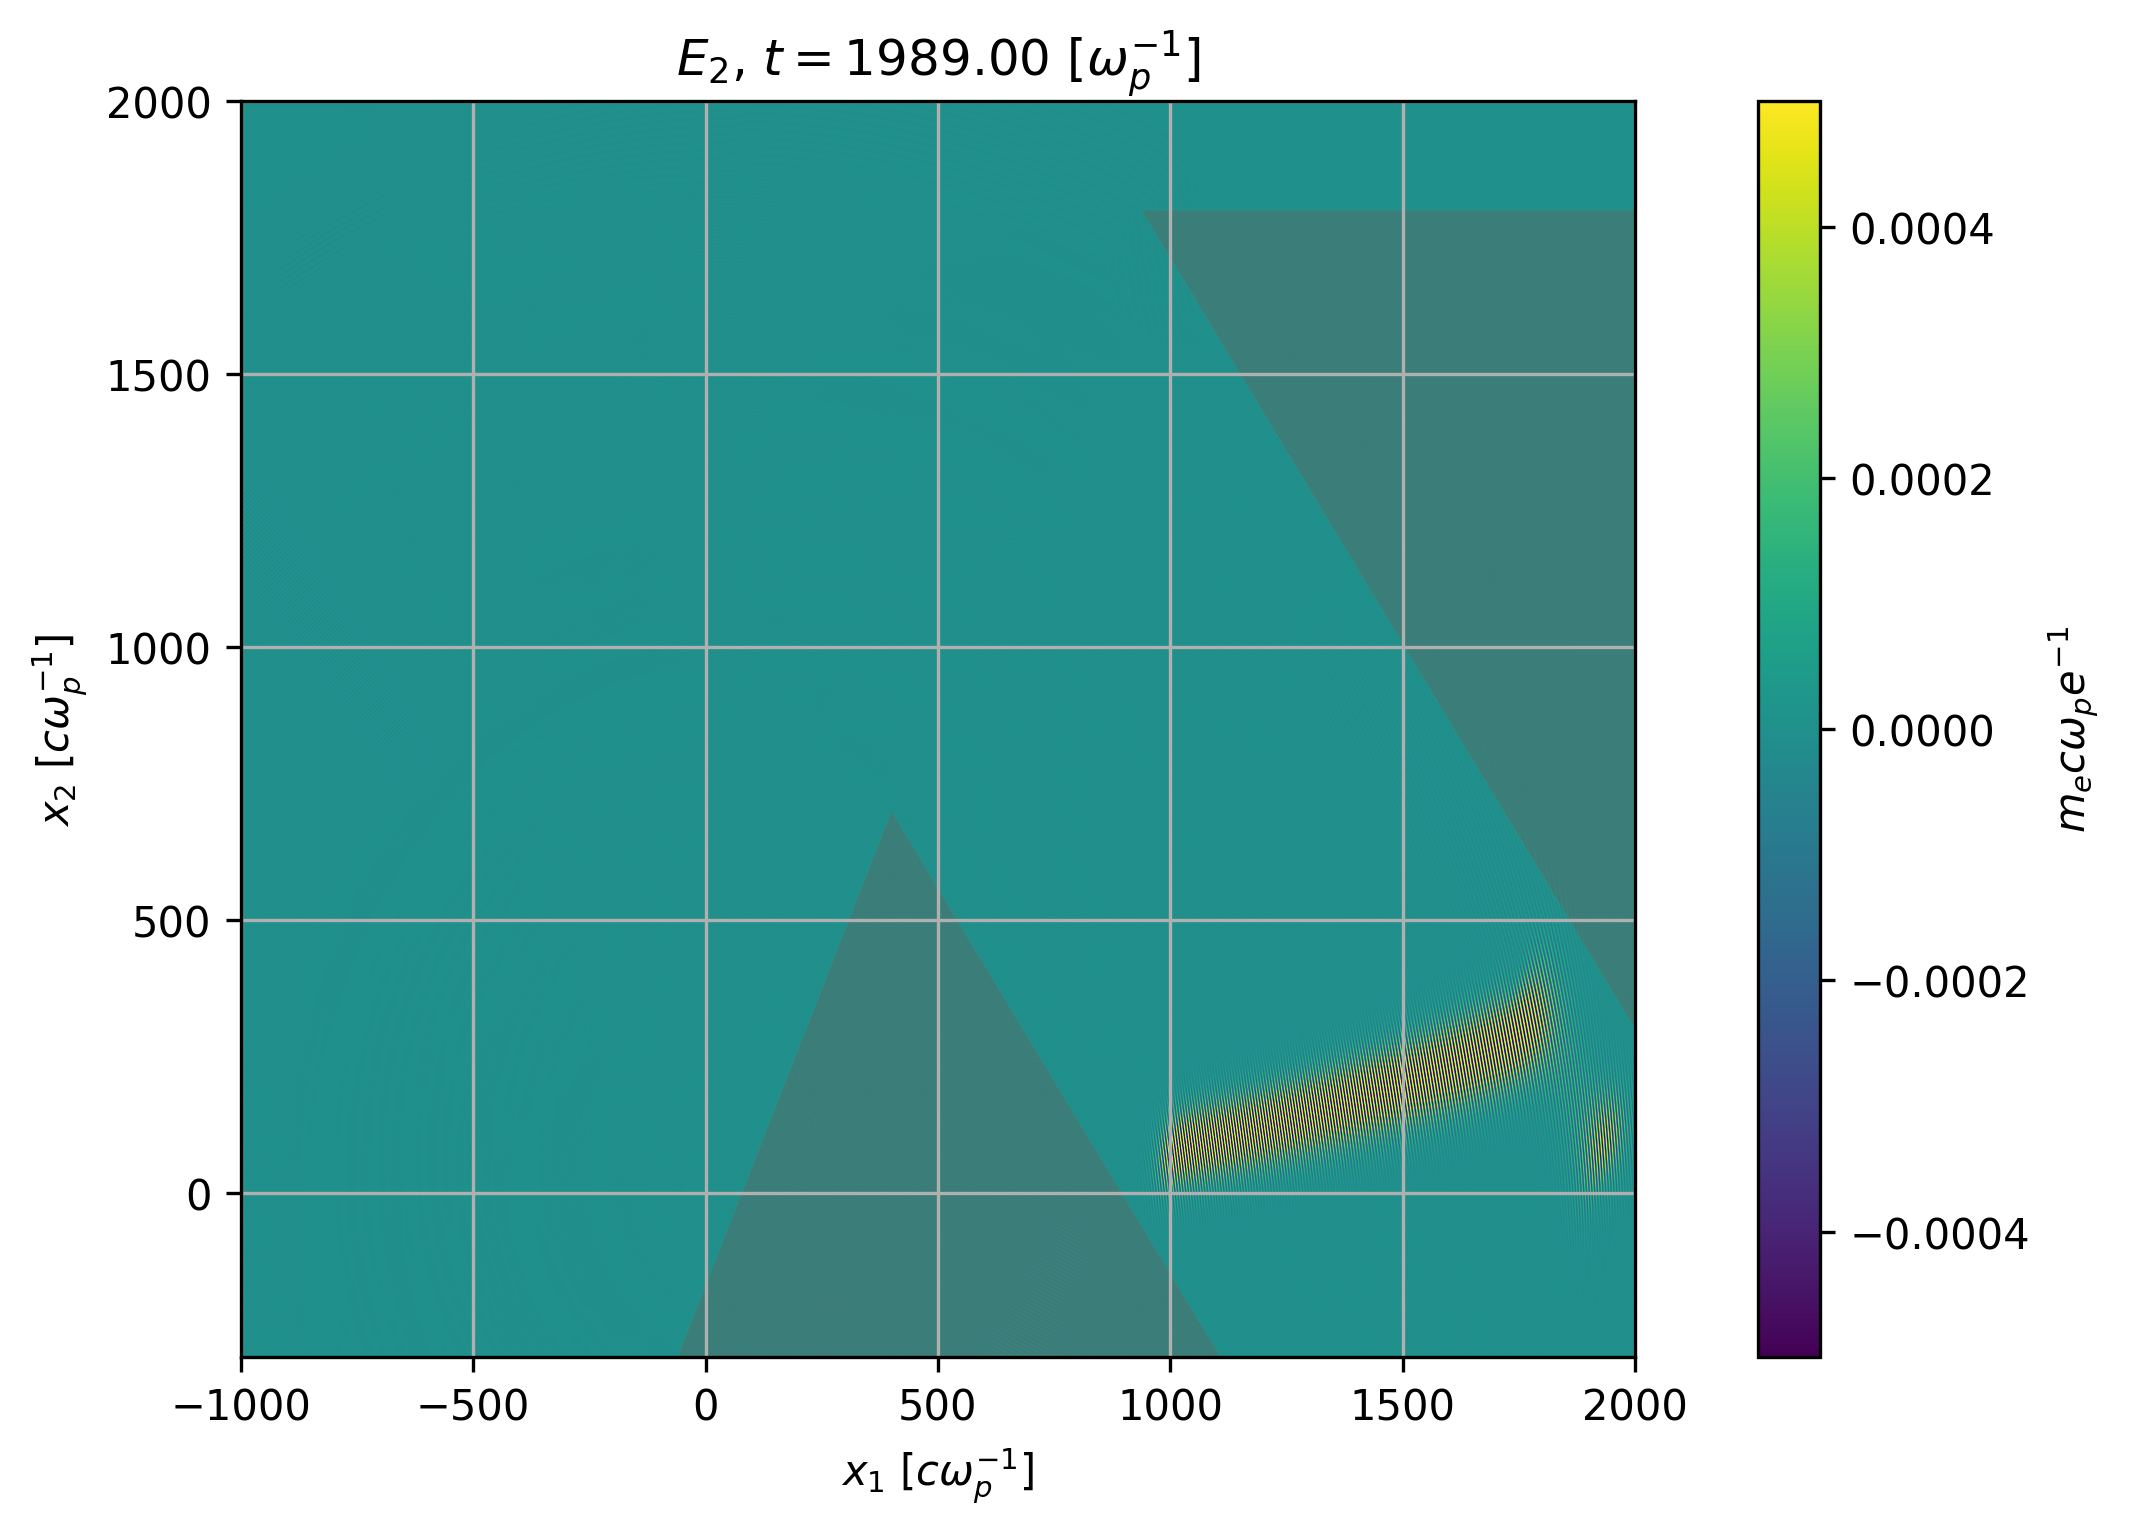

In [4]:
Plot.movie('MS/FLD/e2/', 10, 1, 'out n 0-3 one triangle.mp4', True, (7,5), vmin=-0.0005, vmax=0.0005, aspect='equal')

456


[(0.8, 1.2)]

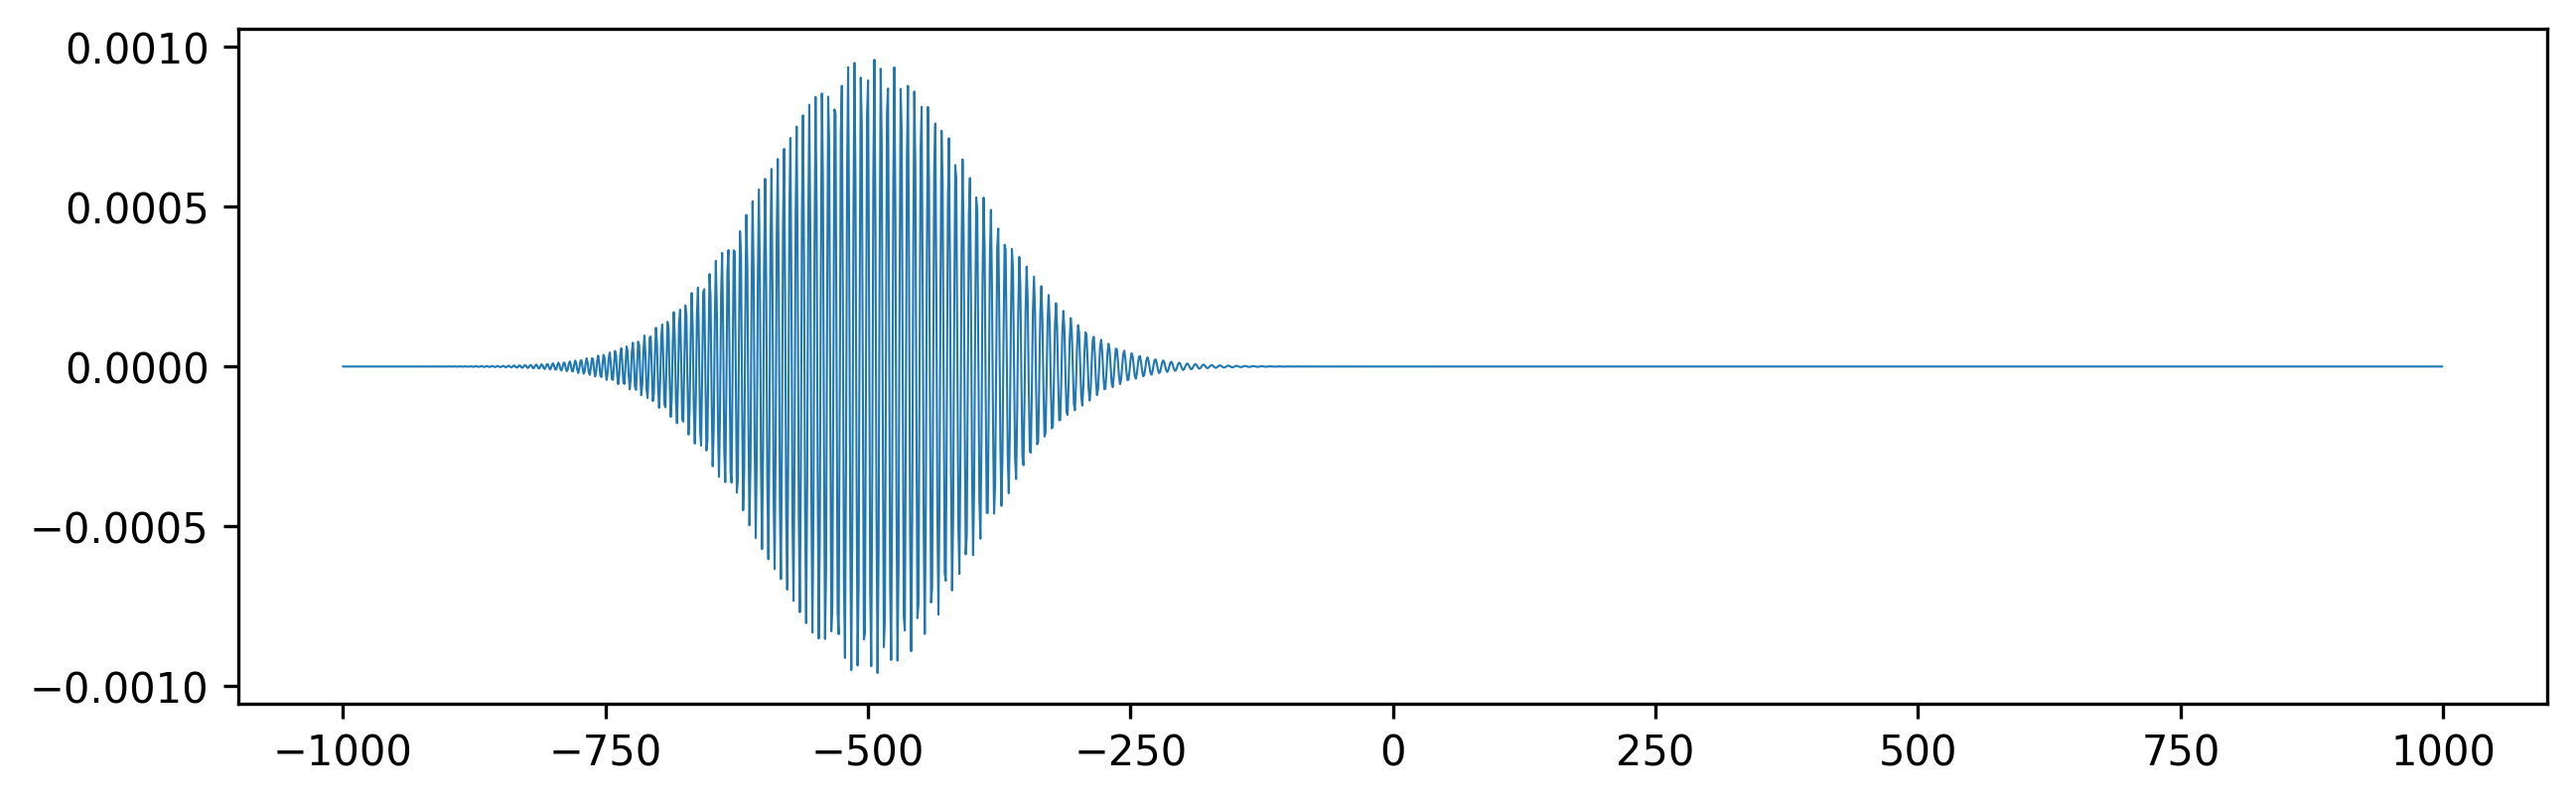

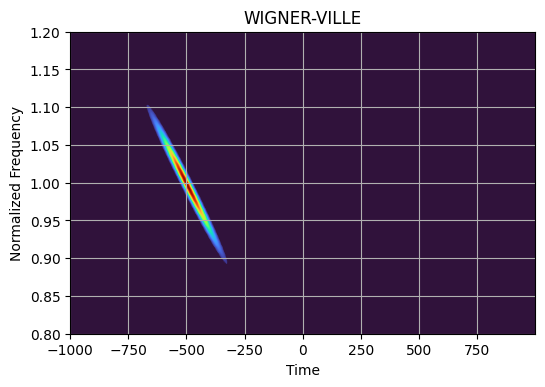

In [101]:
data = osh5io.read_h5('e2-000000.h5', 'MS/FLD/e2/')
print(np.argwhere(np.abs(data.axes[0].ax) < 0.5)[0][0])
E = data.view(np.ndarray)[np.argwhere(np.abs(data.axes[0].ax) < 0.5)[0][0]][:2000]

t = data.axes[1].ax[:2000]
fig, ax = plt.subplots(dpi=300, figsize=(10,3))
ax.plot(t, E, linewidth=0.5)

fig, ax = plt.subplots(dpi=100)
wig = WVD(E, timestamps=t)
wig.run(True)
wig.plot(ax=ax, show=False, cmap='turbo')
ax.set(ylim=[0.8,1.2])